# Balancing Target Classes

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 3 of 7 (Exploratory Data Analysis)

**Current Notebook**: 4 of 7

**Next Notebook**: 5 of 7 (Logistic Regression)

---

In this notebook I will explore using different methods to balance the classes of 'Dep_Delay_classes' so that there is no bias towards the majority class when fitting different models. I have decided to compare the results of Upsampling using the RandomOverSampler method, Downsampling using the RandomUnderSampler method and Upsampling using the SMOTEN method, all from the Imbalanced Learn library. After balancing the data I will run simple Logistic Regression models to test whether balancing the data has improved model precision and recall. 

**RandomOverSampler** randomly samples with replacement from the minority classes to balance the data.

**RandomUnderSampler** randomly samples a subset of the data from the majority class to balance the data.

**SMOTEN** (Synthetic Minority Oversampling Technique - SMOTE) generates new samples of the minority classes through interpolation. SMOTEN is specifically used for categorical data. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Balancing-Target-Classes" data-toc-modified-id="Balancing-Target-Classes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Balancing Target Classes</a></span><ul class="toc-item"><li><span><a href="#Upsampling-with-SMOTEN" data-toc-modified-id="Upsampling-with-SMOTEN-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Upsampling with SMOTEN</a></span></li><li><span><a href="#Upsampling-with-RandomOverSampler" data-toc-modified-id="Upsampling-with-RandomOverSampler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Upsampling with RandomOverSampler</a></span></li><li><span><a href="#Downsampling-with-RandomUnderSampler" data-toc-modified-id="Downsampling-with-RandomUnderSampler-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Downsampling with RandomUnderSampler</a></span><ul class="toc-item"><li><span><a href="#Save-balanced-data-sets" data-toc-modified-id="Save-balanced-data-sets-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Save balanced data sets</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Upsampled-Data-Using-Random-Over-Sampler" data-toc-modified-id="Upsampled-Data-Using-Random-Over-Sampler-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Upsampled Data Using Random Over Sampler</a></span></li><li><span><a href="#Downsampled-Data-Using-Random-Under-Sampler" data-toc-modified-id="Downsampled-Data-Using-Random-Under-Sampler-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Downsampled Data Using Random Under Sampler</a></span></li><li><span><a href="#Upsampled-Data-Using-SMOTEN" data-toc-modified-id="Upsampled-Data-Using-SMOTEN-1.4.0.3"><span class="toc-item-num">1.4.0.3&nbsp;&nbsp;</span>Upsampled Data Using SMOTEN</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

---

Install Imbalanced Learn library using pip install:

In [1]:
!pip install imbalanced-learn

Read in the required libraries. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#split the data for SMOTEN sampling
from sklearn.model_selection import train_test_split

# count the target classes
from collections import Counter

# sampling techniques
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

Read in the training and validation data sets that were created in Notebook 3 (EDA).

In [3]:
X_train = pd.read_pickle("data/X_train.pkl")
y_train = pd.read_pickle("data/y_train.pkl")

X_validation = pd.read_pickle("data/X_validation.pkl")
y_validation = pd.read_pickle("data/y_validation.pkl")

Check the shape of the data sets.

In [4]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((304062, 14), (304062,), (130313, 14), (130313,))

---

## Upsampling with SMOTEN

Before I can use SMOTEN to balance X_train and y_train, I need to use train_test_split to divide X_train and y_train into two 50/50 samples. I'm doing this because my kernel was crashing when I attempted to run SMOTEN on the full X_train and y_train data sets. As a workaround I am splitting the data, running SMOTEN on each half of the data sets and then concatenating them together once the upsampling is complete. 

Use `train_test_split` to split X_train and y_train into X_train1, y_train1 and X_train2 and y_train2. Set test_size = 0.5 so they are split evenly at 50%. Random_state = 10 so the results are reproducible and stratify = y_train so an even number of classes are preserved in each split.

In [5]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.5, random_state = 10, stratify = y_train)



Check the shape of the new dataframes are correct.

In [6]:
X_train1.shape, y_train1.shape

((152031, 14), (152031,))

In [7]:
X_train2.shape, y_train2.shape

((152031, 14), (152031,))

---

Use `Counter` to get the original counts for each class in y_train1.

In [8]:
print(f"Original class counts: {Counter(y_train1)}")

Original class counts: Counter({'1': 113570, '2': 30199, '3': 8262})


Run SMOTEN with X_train1 and y_train1.

In [9]:
# instantiate SMOTEN, random_state = 10 makes the results reproducible
sampler = SMOTEN(random_state = 10)

# Upsample X_train1 and y_train1 and save the outputs
X_train1_smote, y_train1_smote = sampler.fit_resample(X_train1, y_train1)

Print the counts for each class after upsampling. 

In [10]:
print(f"Class counts after resampling: {Counter(y_train1_smote)}")

Class counts after resampling: Counter({'1': 113570, '3': 113570, '2': 113570})


---

Repeat for X_train2 and y_train2.

Original class counts for y_train2.

In [58]:
print(f"Original class counts: {Counter(y_train2)}")

Original class counts: Counter({'1': 113569, '2': 30200, '3': 8262})


Run SMOTEN with X_train2 and y_train2.

In [59]:
# instantiate SMOTEN, random_state = 10 makes the results reproducible
sampler = SMOTEN(random_state = 10)

# Upsample X_train1 and y_train1 and save the outputs
X_train2_smote, y_train2_smote = sampler.fit_resample(X_train2, y_train2)

New class counts after upsampling with SMOTEN.

In [67]:
print(f"Class counts after resampling: {Counter(y_train2_smote)}")

Class counts after resampling: Counter({'1': 113569, '2': 113569, '3': 113569})


---

Concatenate X_train1_smote and X_train2_smote, and y_train1_smote and y_train2_smote using `concat`.

In [61]:
X_train_smote = pd.concat([X_train1_smote, X_train2_smote])

Check the shape of X_train_smote.

In [62]:
X_train_smote.shape

(681417, 14)

Repeat for y_train.

In [64]:
y_train_smote = pd.concat([y_train1_smote, y_train2_smote])

Check the shape of y_train_smote.

In [65]:
y_train_smote.shape

(681417,)

---

## Upsampling with RandomOverSampler

This method can be run on the full data set.

In [11]:
# print the original class balance
print(f"Original class counts: {Counter(y_train)}")

Original class counts: Counter({'1': 227139, '2': 60399, '3': 16524})


In [12]:
# instantiate RandomOverSampler use random_state = 10 to make the results reproducible
ros = RandomOverSampler(random_state = 10)

# fit on X_train and y_train data and save the outputs 
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [13]:
# print the class balance after upsampling
print(f"Class counts after resampling {Counter(y_train_over)}")

Class counts after resampling Counter({'3': 227139, '1': 227139, '2': 227139})


---

## Downsampling with RandomUnderSampler

This method can be run on the full data set.

In [14]:
# print the original class balance
print(f"Original class counts: {Counter(y_train)}")

Original class counts: Counter({'1': 227139, '2': 60399, '3': 16524})


In [15]:
# instantiate RandomUnderSampler use random_state = 10 to make the results reproducible
rus = RandomUnderSampler(random_state = 10, replacement = True)

# fit on the X_train and y_train data and save the outputs
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [16]:
# print the class balance after down sampling
print(f"Class counts after resampling {Counter(y_train_under)}")

Class counts after resampling Counter({'1': 16524, '2': 16524, '3': 16524})


---

### Save balanced data sets

Save the new balanced data sets using `to_pickle` so they can be used in modeling notebooks.

In [18]:
X_train_smote.to_pickle("X_train_smote.pkl")
y_train_smote.to_pickle("y_train_smote.pkl")

X_train_over.to_pickle("X_train_over.pkl")
y_train_over.to_pickle("y_train_over.pkl")

X_train_under.to_pickle("X_train_under.pkl")
y_train_under.to_pickle("y_train_under.pkl")

---

## Logistic Regression

I will fit basic Logistic Regression models on the original data as well as the balanced data sets to compare the sampling methods. I will use precision, recall and f1-scores to evaluate the sampling methods since the models will be making predictions on imbalanced data sets. These metrics will allow me to understand how the model is predicting each class. I want to have higher recall scores for classes 2 and 3 since I am trying to predict departure delays.

#### Upsampled Data Using Random Over Sampler

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrices: 



/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


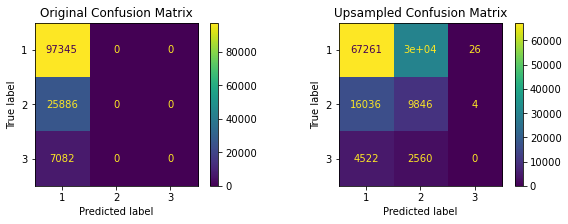


Original data classification report: 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86     97345
           2       0.00      0.00      0.00     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.75    130313
   macro avg       0.25      0.33      0.29    130313
weighted avg       0.56      0.75      0.64    130313


Upsampled data classification report: 
               precision    recall  f1-score   support

           1       0.77      0.69      0.73     97345
           2       0.23      0.38      0.29     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.59    130313
   macro avg       0.33      0.36      0.34    130313
weighted avg       0.62      0.59      0.60    130313



In [19]:
# MODELING 

### ORIGINAL DATA ###
# instantiate the model
LR_model_1 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the original X_train and y_train data
LR_model_1.fit(X_train, y_train)

# make predictions using original X_validation data
y_predictions = LR_model_1.predict(X_validation)

# create a classification report using y_validation and y_predictions
report_original = classification_report(y_validation, y_predictions)




### UPSAMPLED DATA ###
# instantiate the model
LR_model_2 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the upsampled X_train_over and y_train_over data
LR_model_2.fit(X_train_over, y_train_over)

# make predictions using original X_validation data
y_predictions_up = LR_model_2.predict(X_validation) 

# classification report
report_up = classification_report(y_validation, y_predictions_up)





# RESULTS

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
plot_confusion_matrix(LR_model_2, X_validation, y_validation, ax=axes[1])
axes[1].set_title('Upsampled Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nUpsampled data classification report:", print_line, report_up)

The Logistic Regression (LR) model that was fit on the original data (LR_model_1) only predicted the majority class (Class 1 - on-time flights). The LR model fit on the upsampled data (LR_model_2) has better precision and recall scores for Class 2 (0-30 minutes delay), but still does not predict Class 3 (30-120 minutes delay). Since this was only a basic LR model, tuning the hyperparameters and exploring other more powerful models should help improve the precision and recall scores.

---

#### Downsampled Data Using Random Under Sampler

Confusion matrices: 



/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


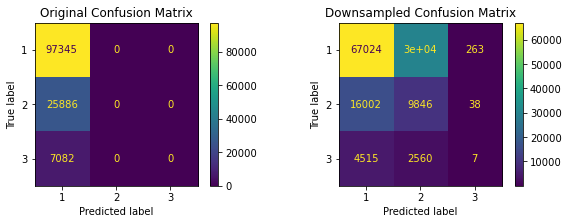


Original data classification report: 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86     97345
           2       0.00      0.00      0.00     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.75    130313
   macro avg       0.25      0.33      0.29    130313
weighted avg       0.56      0.75      0.64    130313


Downsampled data classification report: 
               precision    recall  f1-score   support

           1       0.77      0.69      0.73     97345
           2       0.23      0.38      0.29     25886
           3       0.02      0.00      0.00      7082

    accuracy                           0.59    130313
   macro avg       0.34      0.36      0.34    130313
weighted avg       0.62      0.59      0.60    130313



In [24]:
# Modeling

### DOWNSAMPLED DATA ###
# instantiate the model
LR_model_4 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the downsampled X_train_down and y_train_down data
LR_model_4.fit(X_train_under, y_train_under)

# make predictions using original X_validation data
y_predictions_down = LR_model_4.predict(X_validation) 

# create a classification report using y_validation and y_predictions_down
report_down = classification_report(y_validation, y_predictions_down)





# RESULTS

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the downsampled data
plot_confusion_matrix(LR_model_4, X_validation, y_validation, ax=axes[1])
axes[1].set_title('Downsampled Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nDownsampled data classification report:", print_line, report_down)

The downsampled LR model performs slightly better than the upsampled LR model, it makes some right predictions for class 3, however the precision and recall scores remain the same. 

#### Upsampled Data Using SMOTEN

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

Confusion matrices: 



/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


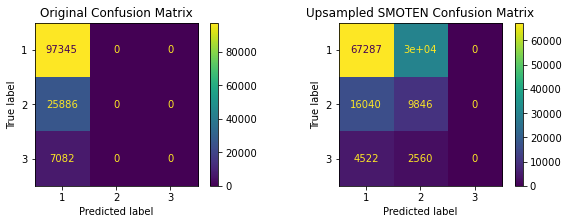


Original data classification report: 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86     97345
           2       0.00      0.00      0.00     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.75    130313
   macro avg       0.25      0.33      0.29    130313
weighted avg       0.56      0.75      0.64    130313


Upsampled SMOTEN data classification report: 
               precision    recall  f1-score   support

           1       0.77      0.69      0.73     97345
           2       0.23      0.38      0.29     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.59    130313
   macro avg       0.33      0.36      0.34    130313
weighted avg       0.62      0.59      0.60    130313



In [21]:
# MODELING

### SMOTEN UPSAMPLED DATA ###
# instantiate the model
LR_model_6 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the SMOTEN upsampled X_train_smote and y_train_smote data
LR_model_6.fit(X_train_smote, y_train_smote)

# make predictions using original X_validation data
y_predictions_smote = LR_model_6.predict(X_validation) 

# create a classification report using y_validation and y_predictions_smote
report_smote = classification_report(y_validation, y_predictions_smote)




# RESULTS 

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
plot_confusion_matrix(LR_model_6, X_validation, y_validation, ax=axes[1])
axes[1].set_title('Upsampled SMOTEN Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nUpsampled SMOTEN data classification report:", print_line, report_smote)

Sampling with SMOTEN does not improve the results more than upsampling or downsampling. The SMOTEN LR model does not make any predictions for class 3, so it's actually slightly worse than downsampling. 

----

## Results

Comparing the results side-by-side.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and wi

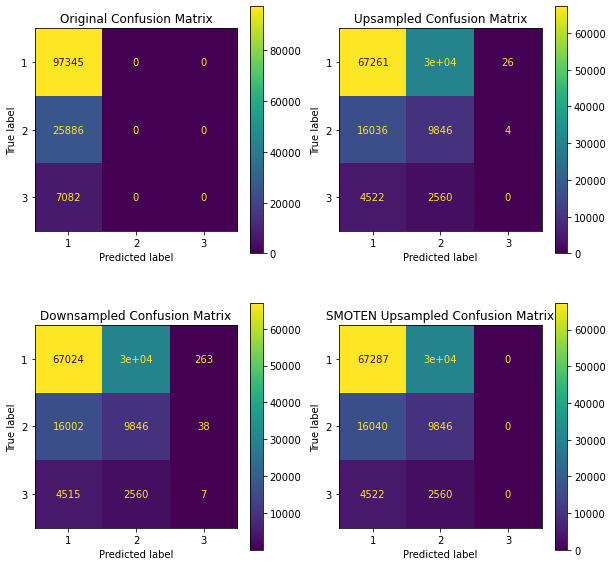


Upsampled data classification report: 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86     97345
           2       0.00      0.00      0.00     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.75    130313
   macro avg       0.25      0.33      0.29    130313
weighted avg       0.56      0.75      0.64    130313


Upsampled data classification report: 
               precision    recall  f1-score   support

           1       0.77      0.69      0.73     97345
           2       0.23      0.38      0.29     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.59    130313
   macro avg       0.33      0.36      0.34    130313
weighted avg       0.62      0.59      0.60    130313


Downsampled data classification report: 
               precision    recall  f1-score   support

           1       0.77      0.69      0.73     97345
    

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0, 0])
axes[0, 0].set_title("Original Confusion Matrix")

plot_confusion_matrix(LR_model_2, X_validation, y_validation, ax=axes[0, 1])
axes[0, 1].set_title("Upsampled Confusion Matrix")

# Model on the upsampled data
plot_confusion_matrix(LR_model_4, X_validation, y_validation, ax=axes[1, 0])
axes[1, 0].set_title('Downsampled Confusion Matrix')

plot_confusion_matrix(LR_model_6, X_validation, y_validation, ax=axes[1, 1])
axes[1, 1].set_title('SMOTEN Upsampled Confusion Matrix')

plt.show()

print_line = "\n=======================================================\n"

# Classification Reports
print("\nUpsampled data classification report:", print_line, report_original)
print("\nUpsampled data classification report:", print_line, report_up)
print("\nDownsampled data classification report:", print_line, report_down)
print("\nSMOTEN Upsampled data classification report:", print_line, report_smote)

All methods of sampling improved the precision and recall scores for class 2, but no models were able to correctly predict class 3. This seems to be a limitation of the model rather than the data sets. 


## Next Steps
In the next notebook (Notebook 5 Logistic Regression) I will create pipelines for Logistic Regression and tune the hyperparameters and check the results for each data set again. 

---